# The XOR function

Let's implement the binary XOR function, which can be used to determine whether two bits are different:

a | b | a xor b
--|---|--------
0 | 0 |    0
0 | 1 |    1
1 | 0 |    1
1 | 1 |    0

## Define training data

Translating the table above to numpy arrays to train with:

In [1]:
import numpy as np

data = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]])

labels = np.array([
    0,
    1,
    1,
    0])

## Importing Keras

I use TensorFlow on the CPU as the backend:

In [2]:
from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


## Define a neural network

For learning the XOR function, a small network with only one hidden layer containing three neurons is sufficient. The sigmoid (also known as logistic) activation function allows the network to learn non-linear relationships. Any optimizer would probably do here, so SGD is as a good a choice as any.

In [3]:
model = models.Sequential()
model.add(layers.Dense(3, activation='sigmoid', input_shape=(2,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer=optimizers.SGD(lr=0.5))

## Train the network

We train the network for 5,000 epochs, which means it feeds in the training data 5,000 times before stopping:

In [4]:
history = model.fit(data, labels, epochs=5000, verbose=0)

## Visualize the loss

The network is expected to learn the XOR function better with each epoch that we train, so the loss should get smaller and smaller with each epoch:

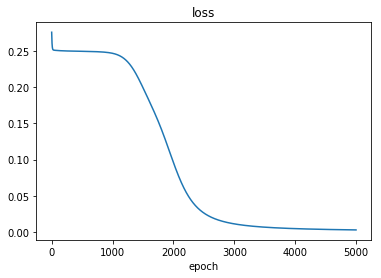

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.title('loss')
plt.xlabel('epoch')
plt.plot(history.history['loss'])
plt.show()

## Use the trained network

Now that the network has been trained, and the loss is nice and low, feed it the four different input patterns once more and ask it to predict what the output should be. They should be close to 0, 1, 1, and 0, respectively:

In [6]:
model.predict(data)

array([[0.02574676],
       [0.9518926 ],
       [0.9510212 ],
       [0.07082517]], dtype=float32)

On an earlier run I saw 0.02154981, 0.9540355, 0.9636985, and 0.04899467, which meant the network had learned the following:

a | b |   a xor b
--|---|-----------
0 | 0 | 0.02154981
0 | 1 | 0.9540355
1 | 0 | 0.9636985
1 | 1 | 0.04899467

This is pretty good. If we were to round these numbers, we'd get exactly what we needed.

Note that each time a new training sessions is started, it may give slightly different numbers. This is because at the start the weights in the network are initialized to small random numbers, which of course are different each time.